# Best Zipcodes for Investment

## Zillow Data Time Serise Modeling

### Introduction

Module 4 project is about working with the Zillow data. This project will demosntrate knowledges of time serise modeling, desingning and performing of data analysis.


### Objecting

The objecting of  this proejct is to identify top 5 zipcodes to invest in United States

### Zipcode Selection Method

1. Ten years growth %
2. Population growth
3. Unemployment rate
4. Property tax rate
5. 
6. Time serise modeling 



### EDA/Data Cleaning

Let's explor what we're dealing with for the data


In [1]:
# Importing required libraries as tools
import pandas as pd
from pandas import Series

import numpy as np

from datetime import datetime

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import itertools

from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


There're median house values from April 1996 to April of 2018.

#### Nan/Missing Values/ Duplicates

Looking at the data, starting column 7 to last column, it is filled up with median house data.
Let's look for missing, or duplicate data

In [5]:
# Creating column name as missing, and count total number of missing values per rows
dates = list(df.columns[7:])
df['missing'] = df[dates].isna().sum(axis=1)

In [6]:
#Counting numbers of values
df.missing.value_counts()

0      13684
167      230
87       118
111       78
117       56
219       56
201       55
213       53
105       52
207       42
171       41
177       33
93        31
123       27
189       27
183       24
99        21
129       20
195       18
107       13
153       11
147        9
159        7
135        7
141        6
21         2
15         1
165        1
Name: missing, dtype: int64

I decided to drop any rows with more than two years of missing data. 
For time serise data, just filling data in with the median value is not good.

In [7]:
# Dropping data columns with more than 2 years of data missing
missing_values = df[df.missing>24].sort_values(['missing'], ascending=False)
missing_index = missing_values.index
df.drop(index=missing_index, inplace =True)

Is there any column left with missig values?

In [8]:
#Locating rows with less than two years data 
less_than_two = df[df.missing>0]
less_than_two

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,missing
9906,67592,23192,Montpelier,VA,Richmond,Hanover,9907,NaN,NaN,NaN,...,280300,283600,286000,287700,290000,292500,293500,294100,295300,21
11332,67482,23015,Beaverdam,VA,Richmond,Hanover,11333,NaN,NaN,NaN,...,230800,232500,233300,233800,233700,234000,234900,236700,238300,21
13504,67499,23047,Doswell,VA,Richmond,Hanover,13505,NaN,NaN,NaN,...,253800,254400,254100,253400,254400,257000,258400,258800,260300,15


There're three rows with less than 2 years of missing data.
For those columns with missing data will be back filled with latest median values.

In [9]:
# Locating rows with less than two years of missing values
less_than_two.bfill(axis ='columns')

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,missing
9906,67592,23192,Montpelier,VA,Richmond,Hanover,9907,95900,95900,95900,...,280300,283600,286000,287700,290000,292500,293500,294100,295300,21
11332,67482,23015,Beaverdam,VA,Richmond,Hanover,11333,85000,85000,85000,...,230800,232500,233300,233800,233700,234000,234900,236700,238300,21
13504,67499,23047,Doswell,VA,Richmond,Hanover,13505,80900,80900,80900,...,253800,254400,254100,253400,254400,257000,258400,258800,260300,15


Let's also drop any NaN

In [10]:
# Dropping any rows with NaN
df.dropna(axis=0, how='any', inplace=True)

Dropping any duplicate RegionID or RegionName

In [11]:
# Dropping duplicates
df.drop_duplicates(subset ="RegionID", keep = False, inplace = True)
df.drop_duplicates(subset ="RegionName", keep = False, inplace = True)

Missing column is no longer needed. 

In [12]:
# Dropping missing column

df.drop(['missing'], axis=1, inplace= True)

Checking how the dataframe looks after dropping missing or NaN values.

In [13]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


Let's save firstly cleaned data for later

In [14]:
# Copying dataframe to perserve data
df1 = df.copy()

## Zipcode Pre-selection methods

## 10 years growth

From 2008 to 2018, 10 years growth rate will be calculated 

In [15]:
# Calculating 10 years growth
growth = df1['Ten Years Growth'] = ((df1['2018-04'] - df1['2008-01'])/df1['2008-01'])*100


# Adding new column for the growth percentage to the dataframe
df1['Ten Years Growth'] = growth
df1.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Ten Years Growth
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,16.887830
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,50.444133
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,29.830775
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,12.381771
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,-7.393293


Calculated percent growth will be added to the originial dataframe.


In [16]:
# Dropping everything but Ten Years Growth

df1.drop(df.columns[7:272], axis=1, inplace=True)
df1.drop(df.columns[1:7], axis=1, inplace=True)
df1.head(-2)

,RegionID,Ten Years Growth
0,84654,16.887830
1,90668,50.444133
2,91982,29.830775
3,84616,12.381771
4,93144,-7.393293
...,...,...
14714,94711,-1.440709
14715,62556,-13.751215
14716,99032,-5.569073
14718,58333,6.082108


Looks all good for 10 years growth rate

## Unemployment rate

Second criteria is unemployment rate of the region. Low unemployment rate ensures good renters.

In [17]:
#Loading the data source
df_emp = pd.read_csv('Employment_Data.csv')
df_emp.head()

,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,1,1,"Autauga County, AL",2016,"25,649","24,297","1,352",5.3
1,1,3,"Baldwin County, AL",2016,"89,931","85,061","4,870",5.4
2,1,5,"Barbour County, AL",2016,"8,302","7,584",718,8.6
3,1,7,"Bibb County, AL",2016,"8,573","8,004",569,6.6
4,1,9,"Blount County, AL",2016,"24,525","23,171","1,354",5.5


This data doesn't have zipcode. Insteadl, it has FIPS code as area information. Similar to zip code, FIPS code is also 5 digit code consist of state and county code. State and county FIPS code needs to be combined before it's usable.

In [18]:
# Adding State and County FIPS code to make up 5 digit codes

df_emp['State FIPS Code'] = df_emp['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_emp['County FIPS Code'] = df_emp['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_emp['FIPS'] = df_emp['State FIPS Code'] + df_emp['County FIPS Code']

In [19]:
df_emp.head()

,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),FIPS
0,01,001,"Autauga County, AL",2016,"25,649","24,297","1,352",5.3,01001
1,01,003,"Baldwin County, AL",2016,"89,931","85,061","4,870",5.4,01003
2,01,005,"Barbour County, AL",2016,"8,302","7,584",718,8.6,01005
3,01,007,"Bibb County, AL",2016,"8,573","8,004",569,6.6,01007
4,01,009,"Blount County, AL",2016,"24,525","23,171","1,354",5.5,01009


Let's drop everything else other than FIPS code and unemployment rate

In [20]:
# Dropping columns
df_emp = df_emp.drop(columns= ['State FIPS Code', 'County FIPS Code',
                               'County Name/State Abbreviation', 'Year',
                               'Employed', 'Unemployed', 
                               'Labor Force'])

df_emp.head()

,Unemployment Rate (%),FIPS
0,5.3,01001
1,5.4,01003
2,8.6,01005
3,6.6,01007
4,5.5,01009


## FIPS code to Zipcode

In order to utilize FIPS code and related information, FIPS code must be translated to Zipcode. Data file was used to do so.

In [21]:
# Reading file
zip_df = pd.read_csv("ZIP-FIPS.csv")
zip_df['STCOUNTYFP'] = zip_df['STCOUNTYFP'].apply(lambda x: str(x).zfill(5))
zip_df.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,01001,H1
1,36006,Autauga County,AL,01001,H1
2,36067,Autauga County,AL,01001,H1
3,36066,Autauga County,AL,01001,H1
4,36703,Autauga County,AL,01001,H1


Dataframe was created to have all the criteria informations only

In [22]:
# Coppying and dropping all the price information for pure information only
df_zip = df.copy()
df_zip.drop(df.columns[7:], axis=1, inplace=True)

In [23]:
df_zip

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank
0,84654,60657,Chicago,IL,Chicago,Cook,1
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2
2,91982,77494,Katy,TX,Houston,Harris,3
3,84616,60614,Chicago,IL,Chicago,Cook,4
4,93144,79936,El Paso,TX,El Paso,El Paso,5
...,...,...,...,...,...,...,...
14716,99032,97028,Rhododendron,OR,Portland,Clackamas,14717
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720
14720,75672,40404,Berea,KY,Richmond,Madison,14721


RegionName translates to zipcode according toe Zillow.com index. RegionName is confuising to use, so it will be renamed to Zipcode. All the other data file name will be changed to Zipcode for less confusion.

In [24]:
# Renaming columns to Zipcode
df.rename(columns = {'RegionName':'Zipcode'}, inplace = True) 
df_zip.rename(columns = {'RegionName':'Zipcode'}, inplace = True) 
zip_df.rename(columns = {'ZIP':'Zipcode'}, inplace = True)
zip_df.rename(columns = {'STCOUNTYFP':'FIPS'}, inplace = True)


In [25]:
# Dropping all the other columns other than Zipcode and FIPS code
zip_df = zip_df.drop(columns= ['COUNTYNAME','STATE','CLASSFP'])
zip_df.head()

,Zipcode,FIPS
0,36003,01001
1,36006,01001
2,36067,01001
3,36066,01001
4,36703,01001


Let's add dataframe for FIPS information for corresponding zipcode.

In [26]:
# Adding dataframe using zipcode information for FIPS code
df_zip = pd.merge(df_zip, zip_df, how='right', on = ['Zipcode','Zipcode'] )
df_zip = pd.merge(df_zip, df_emp, how='left', on = ['FIPS','FIPS'] )

In [27]:
df_zip.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,FIPS,Unemployment Rate (%)
0,84654.0,60657,Chicago,IL,Chicago,Cook,1.0,17031,6.2
1,90668.0,75070,McKinney,TX,Dallas-Fort Worth,Collin,2.0,48085,3.5
2,91982.0,77494,Katy,TX,Houston,Harris,3.0,48157,5.0
3,91982.0,77494,Katy,TX,Houston,Harris,3.0,48201,5.3
4,91982.0,77494,Katy,TX,Houston,Harris,3.0,48473,5.7


In [28]:
# Adding 10 years growth to the dataframe
df_zip = pd.merge(df_zip, df1, how='left', on = ['RegionID','RegionID'] )

In [29]:
df_zip.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,FIPS,Unemployment Rate (%),Ten Years Growth
0,84654.0,60657,Chicago,IL,Chicago,Cook,1.0,17031,6.2,16.887830
1,90668.0,75070,McKinney,TX,Dallas-Fort Worth,Collin,2.0,48085,3.5,50.444133
2,91982.0,77494,Katy,TX,Houston,Harris,3.0,48157,5.0,29.830775
3,91982.0,77494,Katy,TX,Houston,Harris,3.0,48201,5.3,29.830775
4,91982.0,77494,Katy,TX,Houston,Harris,3.0,48473,5.7,29.830775


Now, it's time to add data for population growth.
source is from https://www2.census.gov/programs-surveys/popest/datasets/2010-2018/national/totals/

In [30]:
# Reading Population Data
pop = pd.read_csv("Population_Growth.csv", encoding='latin-1')
pop.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,40,3,6,1,0,Alabama,Alabama,4779736,4780138,4785448,...,0.424031,1.171362,0.516888,1.234191,1.607294,0.619874,0.646064,0.817666,1.079070,1.856398
1,50,3,6,1,1,Alabama,Autauga County,54571,54574,54754,...,1.066088,0.666403,6.002073,-6.119262,-3.885124,1.971001,-1.859380,5.250727,1.029950,0.630381
2,50,3,6,1,3,Alabama,Baldwin County,182265,182264,183111,...,21.996950,24.298662,16.345147,17.638173,22.876199,20.239802,17.932091,21.484903,22.534622,24.846682
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27330,...,-25.501697,-9.072923,0.256035,-6.786002,-8.093425,-5.102231,-15.531931,-18.152860,-25.030896,-8.593297
4,50,3,6,1,7,Alabama,Bibb County,22915,22920,22872,...,-3.589550,-7.029251,-5.041759,-3.787629,-5.666224,1.065317,1.507660,-0.753246,-3.146396,-6.584362


In [31]:
# Creating 5 digit FIPS code

pop['STATE'] = pop['STATE'].apply(lambda x: str(x).zfill(2))
pop['COUNTY'] = pop['COUNTY'].apply(lambda x: str(x).zfill(3))
pop['FIPS'] = pop['STATE'] + pop['COUNTY']

In [32]:
# Calculating 10 years pupulation growth from 2008 to 2018
popgrowth = pop['Population Growth'] = ((pop['POPESTIMATE2018'] - pop['POPESTIMATE2010'])/pop['POPESTIMATE2010'])*100

In [33]:
# Dropping everything but FIPS and Population growth in percentage
pop.drop(pop.columns[0:-2], axis=1, inplace=True)
pop.head()

,FIPS,Population Growth
0,01000,2.140301
1,01001,1.546919
2,01003,19.065485
3,01005,-8.960849
4,01007,-2.063659


In [34]:
# Adding Population growth to the dataframe
df_zip = pd.merge(df_zip, pop, how='left', on = ['FIPS','FIPS'] )

In [35]:
df_zip.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,FIPS,Unemployment Rate (%),Ten Years Growth,Population Growth
0,84654.0,60657,Chicago,IL,Chicago,Cook,1.0,17031,6.2,16.887830,-0.359154
1,90668.0,75070,McKinney,TX,Dallas-Fort Worth,Collin,2.0,48085,3.5,50.444133,27.486869
2,91982.0,77494,Katy,TX,Houston,Harris,3.0,48157,5.0,29.830775,33.476434
3,91982.0,77494,Katy,TX,Houston,Harris,3.0,48201,5.3,29.830775,14.382077
4,91982.0,77494,Katy,TX,Houston,Harris,3.0,48473,5.7,29.830775,22.061391


It's all done and state property tax data sourced from http://worldpopulationreview.com/states/property-taxes-by-state/

In [36]:
# Reading state property tax data 
tax = pd.read_csv("State_Property_Tax.csv")
tax.head()

,State,medianPropertyTax,Pop
0,NJ,0.0189,8922547
1,NH,0.0186,1363852
2,TX,0.0181,29087070
3,WI,0.0176,5832661
4,NE,0.0176,1940919


Data only has state value. It will be added to the corresponding states.

In [37]:
# Dropping population column
tax = tax.drop(columns=['Pop'])

In [38]:
# Adding population to corresponding population
df_zip = pd.merge(df_zip, tax, how='left', on = ['State','State'] )

In [39]:
df_zip.head(-1)

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,FIPS,Unemployment Rate (%),Ten Years Growth,Population Growth,medianPropertyTax
0,84654.0,60657,Chicago,IL,Chicago,Cook,1.0,17031,6.2,16.887830,-0.359154,0.0173
1,90668.0,75070,McKinney,TX,Dallas-Fort Worth,Collin,2.0,48085,3.5,50.444133,27.486869,0.0181
2,91982.0,77494,Katy,TX,Houston,Harris,3.0,48157,5.0,29.830775,33.476434,0.0181
3,91982.0,77494,Katy,TX,Houston,Harris,3.0,48201,5.3,29.830775,14.382077,0.0181
4,91982.0,77494,Katy,TX,Houston,Harris,3.0,48473,5.7,29.830775,22.061391,0.0181
...,...,...,...,...,...,...,...,...,...,...,...,...
53100,NaN,698,NaN,NaN,NaN,NaN,NaN,72153,18.8,NaN,NaN,NaN
53101,NaN,850,NaN,NaN,NaN,NaN,NaN,78010,NaN,NaN,NaN,NaN
53102,NaN,840,NaN,NaN,NaN,NaN,NaN,78010,NaN,NaN,NaN,NaN
53103,NaN,820,NaN,NaN,NaN,NaN,NaN,78010,NaN,NaN,NaN,NaN


Not all the rows has information with it since there were some FIPS code with no corresponding zipcodes. Any rows with missing values will be dropped.

In [40]:
# Dropping rows with missing values and counting numbers of missing values.
df_zip.dropna(axis=0, how='any', inplace=True)
df_zip.isna().sum()

RegionID                 0
Zipcode                  0
City                     0
State                    0
Metro                    0
CountyName               0
SizeRank                 0
FIPS                     0
Unemployment Rate (%)    0
Ten Years Growth         0
Population Growth        0
medianPropertyTax        0
dtype: int64

## Scoring System

- Ten Years Inflation * 1.2
- Unemployment rate * -1
- Population growth *2
- Property Tax * -500

In [41]:
# Defining function with designated weight for criteria
def score(row):
    a=row['Unemployment Rate (%)']*-1
    b=row['Ten Years Growth']*1.2
    c=row['Population Growth']*2
    d=row['medianPropertyTax']*-500
    score = a+b+c+d
    
    return score

In [42]:
# Adding score column after calculating score for each zipcode
df_zip['Score']= score(df_zip)

In [43]:
df_zip.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,FIPS,Unemployment Rate (%),Ten Years Growth,Population Growth,medianPropertyTax,Score
0,84654.0,60657,Chicago,IL,Chicago,Cook,1.0,17031,6.2,16.887830,-0.359154,0.0173,4.697089
1,90668.0,75070,McKinney,TX,Dallas-Fort Worth,Collin,2.0,48085,3.5,50.444133,27.486869,0.0181,102.956698
2,91982.0,77494,Katy,TX,Houston,Harris,3.0,48157,5.0,29.830775,33.476434,0.0181,88.699799
3,91982.0,77494,Katy,TX,Houston,Harris,3.0,48201,5.3,29.830775,14.382077,0.0181,50.211085
4,91982.0,77494,Katy,TX,Houston,Harris,3.0,48473,5.7,29.830775,22.061391,0.0181,65.169713


In [44]:
# Sorting the score  in descending order
df_zip.sort_values('Score', ascending=[False])

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,FIPS,Unemployment Rate (%),Ten Years Growth,Population Growth,medianPropertyTax,Score
8340,63932.0,15201,Pittsburgh,PA,Pittsburgh,Allegheny,6564.0,42003,5.2,176.005961,-0.450828,0.0135,198.355497
3322,97530.0,94043,Mountain View,CA,San Jose,Santa Clara,2581.0,06085,3.8,153.965728,8.481764,0.0074,194.222401
2639,97693.0,94303,Palo Alto,CA,San Jose,Santa Clara,2055.0,06085,3.8,153.326538,8.481764,0.0074,193.455373
2638,97693.0,94303,Palo Alto,CA,San Jose,Santa Clara,2055.0,06081,3.0,153.326538,6.922088,0.0074,191.136022
7302,97691.0,94301,Palo Alto,CA,San Jose,Santa Clara,5739.0,06085,3.8,148.089795,8.481764,0.0074,187.171281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,61128.0,8611,Trenton,NJ,Trenton,Mercer,5279.0,34021,4.3,-56.982193,0.562076,0.0189,-81.004480
7239,69501.0,27801,Rocky Mount,NC,Rocky Mount,Nash,5691.0,37065,8.6,-44.121916,-8.160562,0.0078,-81.767424
9378,64354.0,15902,Johnstown,PA,Johnstown,Cambria,7403.0,42021,6.9,-45.075758,-8.170094,0.0135,-84.081097
5320,79247.0,48506,Flint,MI,Flint,Genesee,4150.0,26049,5.4,-54.736842,-4.249666,0.0162,-87.683543


In [45]:
# Removing duplicates
df_zip.drop_duplicates(subset ="Zipcode", keep = False, inplace = True) 

In [46]:
# Sorting zipcdoes with higher than 167 for score
high = df_zip[df_zip.Score>176]
high

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,FIPS,Unemployment Rate (%),Ten Years Growth,Population Growth,medianPropertyTax,Score
146,62022.0,11211,New York,NY,New York,Kings,118.0,36047,5.3,151.619402,2.906636,0.0123,176.306555
750,97548.0,94086,Sunnyvale,CA,San Jose,Santa Clara,583.0,06085,3.8,138.820030,8.481764,0.0074,176.047563
1495,62033.0,11222,New York,NY,New York,Kings,1156.0,36047,5.3,160.024173,2.906636,0.0123,186.392280
2306,97527.0,94040,Mountain View,CA,San Jose,Santa Clara,1792.0,06085,3.8,139.377845,8.481764,0.0074,176.716942
3322,97530.0,94043,Mountain View,CA,San Jose,Santa Clara,2581.0,06085,3.8,153.965728,8.481764,0.0074,194.222401
4280,97696.0,94306,Palo Alto,CA,San Jose,Santa Clara,3340.0,06085,3.8,138.846881,8.481764,0.0074,176.079784
7302,97691.0,94301,Palo Alto,CA,San Jose,Santa Clara,5739.0,06085,3.8,148.089795,8.481764,0.0074,187.171281
8340,63932.0,15201,Pittsburgh,PA,Pittsburgh,Allegheny,6564.0,42003,5.2,176.005961,-0.450828,0.0135,198.355497


In [47]:
# Sorting descending order
high.sort_values(by=['Score'],ascending=False)

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,FIPS,Unemployment Rate (%),Ten Years Growth,Population Growth,medianPropertyTax,Score
8340,63932.0,15201,Pittsburgh,PA,Pittsburgh,Allegheny,6564.0,42003,5.2,176.005961,-0.450828,0.0135,198.355497
3322,97530.0,94043,Mountain View,CA,San Jose,Santa Clara,2581.0,06085,3.8,153.965728,8.481764,0.0074,194.222401
7302,97691.0,94301,Palo Alto,CA,San Jose,Santa Clara,5739.0,06085,3.8,148.089795,8.481764,0.0074,187.171281
1495,62033.0,11222,New York,NY,New York,Kings,1156.0,36047,5.3,160.024173,2.906636,0.0123,186.392280
2306,97527.0,94040,Mountain View,CA,San Jose,Santa Clara,1792.0,06085,3.8,139.377845,8.481764,0.0074,176.716942
146,62022.0,11211,New York,NY,New York,Kings,118.0,36047,5.3,151.619402,2.906636,0.0123,176.306555
4280,97696.0,94306,Palo Alto,CA,San Jose,Santa Clara,3340.0,06085,3.8,138.846881,8.481764,0.0074,176.079784
750,97548.0,94086,Sunnyvale,CA,San Jose,Santa Clara,583.0,06085,3.8,138.820030,8.481764,0.0074,176.047563


In [49]:
# Loop for adding zipcodes in the list
zips =[]
for i in high.Zipcode:
    zips.append(i)
zips

[11211, 94086, 11222, 94040, 94043, 94306, 94301, 15201]

## Melting data

Dataframe needs to be reshaped to model time serise.



In [50]:
# Adding info columns with mean price from 2008 to 2018

info_cols = df.columns[:7] 
infos = df[info_cols]

# For 20008 2018 housing prices
values_recent = df[df.columns[-124:]]

recent = pd.concat([infos, values_recent],axis=1)
recent

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,881700.0,875900.0,870300.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,213900.0,213500.0,212600.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,254100.0,252700.0,251100.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,1163000.0,1157000.0,1150800.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,131200.0,130300.0,129300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14716,99032,97028,Rhododendron,OR,Portland,Clackamas,14717,369900.0,367000.0,363000.0,...,332600,332900,335600,338900,340500,341000,342300,345000,348000,349300
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,197300.0,197900.0,198100.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,229000.0,228400.0,227700.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,104400.0,103600.0,103100.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400


In [51]:
# Setting Data as index and putting it into normal form.
def melt_data(df):
    melted = pd.melt(df, id_vars=['SizeRank','RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted.set_index('time',inplace=True)
    melted.dropna(inplace=True)
    return melted

# Melting data for pre-selected zipcodes.
final = pd.DataFrame()
for z in zips:
    d = melt_data(recent[recent.Zipcode==z])
    final = pd.concat([d, final])

final


,SizeRank,RegionID,Zipcode,City,State,Metro,CountyName,value
time,,,,,,,,
2008-01-01,6564,63932,15201,Pittsburgh,PA,Pittsburgh,Allegheny,67100.0
2008-02-01,6564,63932,15201,Pittsburgh,PA,Pittsburgh,Allegheny,67700.0
2008-03-01,6564,63932,15201,Pittsburgh,PA,Pittsburgh,Allegheny,68400.0
2008-04-01,6564,63932,15201,Pittsburgh,PA,Pittsburgh,Allegheny,69500.0
2008-05-01,6564,63932,15201,Pittsburgh,PA,Pittsburgh,Allegheny,70500.0
...,...,...,...,...,...,...,...,...
2017-12-01,118,62022,11211,New York,NY,New York,Kings,1463100.0
2018-01-01,118,62022,11211,New York,NY,New York,Kings,1496100.0
2018-02-01,118,62022,11211,New York,NY,New York,Kings,1531100.0


## Time Serise Modeling

Since pre-selecting zipcodes were completed, we need to build time serise model to predict 5 years growth to finalize top 5 zipcodes.

### Dickey-Fuller Test


Time serise modeling requires stationary data for its predeocity.
Dickey-Fuller test will be peformed to see if the data is stationary.

In [52]:
# Importing Dickey-Fulller test for stationary
from statsmodels.tsa.stattools import adfuller

In [53]:
# Sorting zipcodes
final1 = final.Zipcode.sort_values().unique()

In [54]:
# For loop for ADF test for entire zipcode list
for i in final1:
    df = final[final.Zipcode == i]
    result = adfuller(df.value.dropna())
    print('Zip: ', i)
    print('ADF Statistic %f' % result[0])
    print('p-value: %f' % result[1])

Zip:  11211
ADF Statistic 1.749075
p-value: 0.998242
Zip:  11222
ADF Statistic 0.664217
p-value: 0.989096
Zip:  15201
ADF Statistic 2.101332
p-value: 0.998791
Zip:  94040
ADF Statistic 1.682991
p-value: 0.998086
Zip:  94043
ADF Statistic 1.640533
p-value: 0.997974
Zip:  94086
ADF Statistic 2.302336
p-value: 0.998957
Zip:  94301
ADF Statistic 0.457799
p-value: 0.983532
Zip:  94306
ADF Statistic 0.885175
p-value: 0.992894


P Values are greater than 0.05. It will need to be differenciated in order to make it stationary.
Let's take a look at ACF plot to figure out required differenciation numbers. 

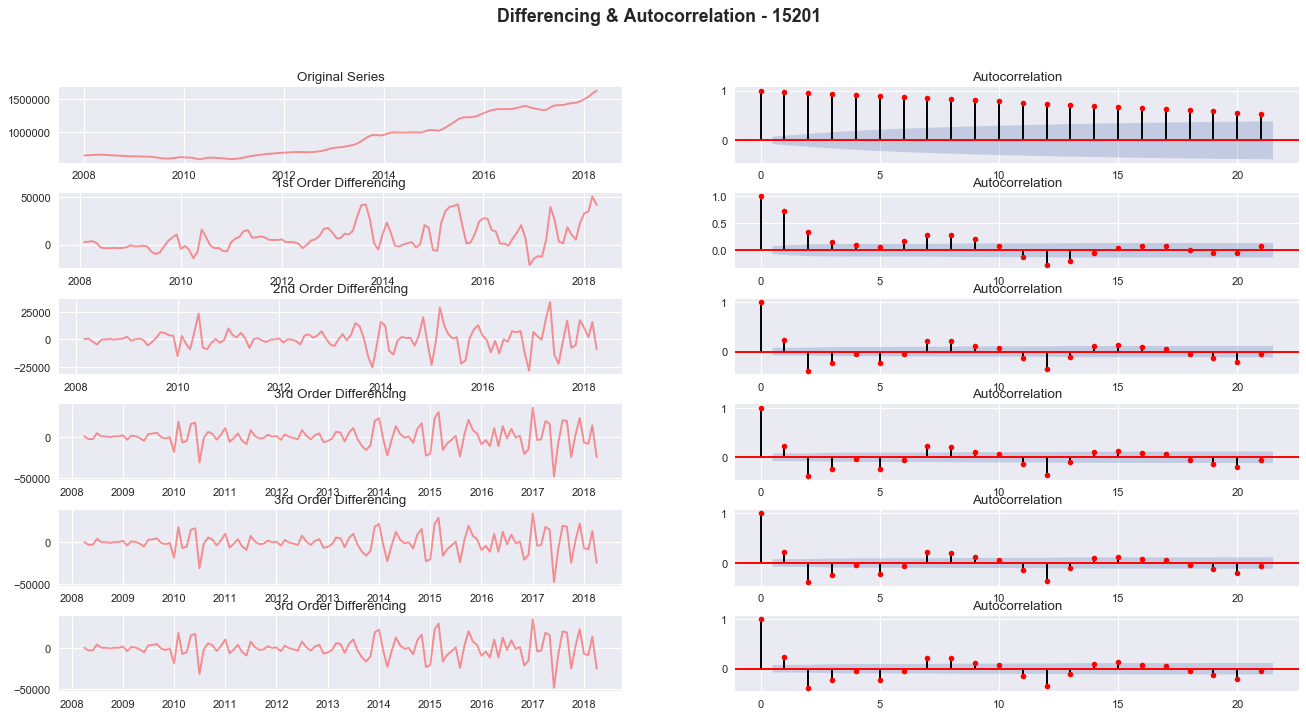

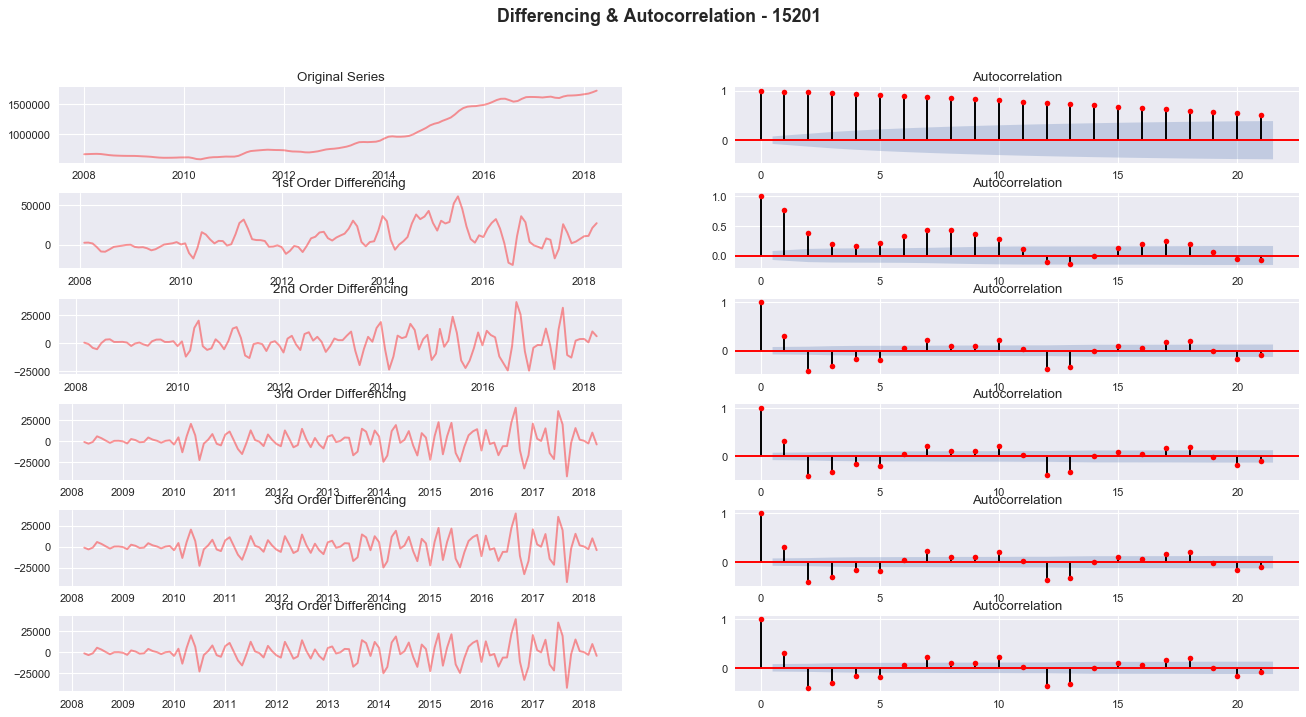

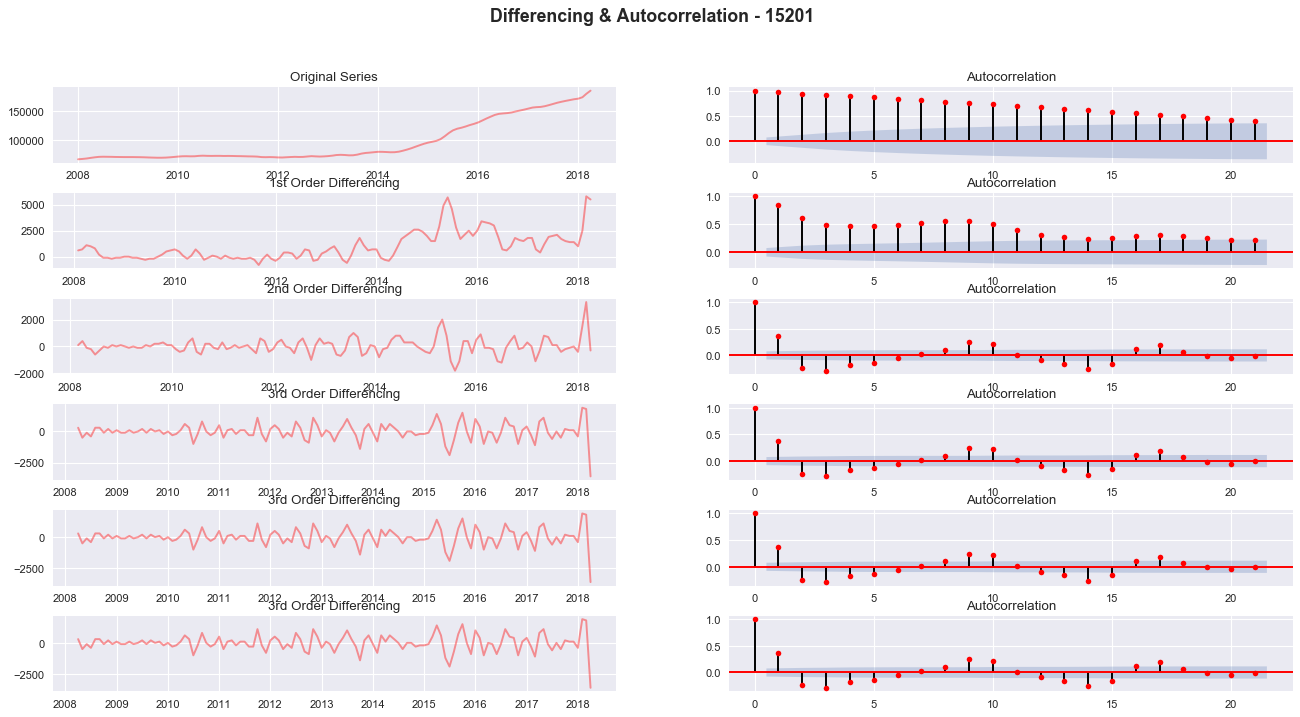

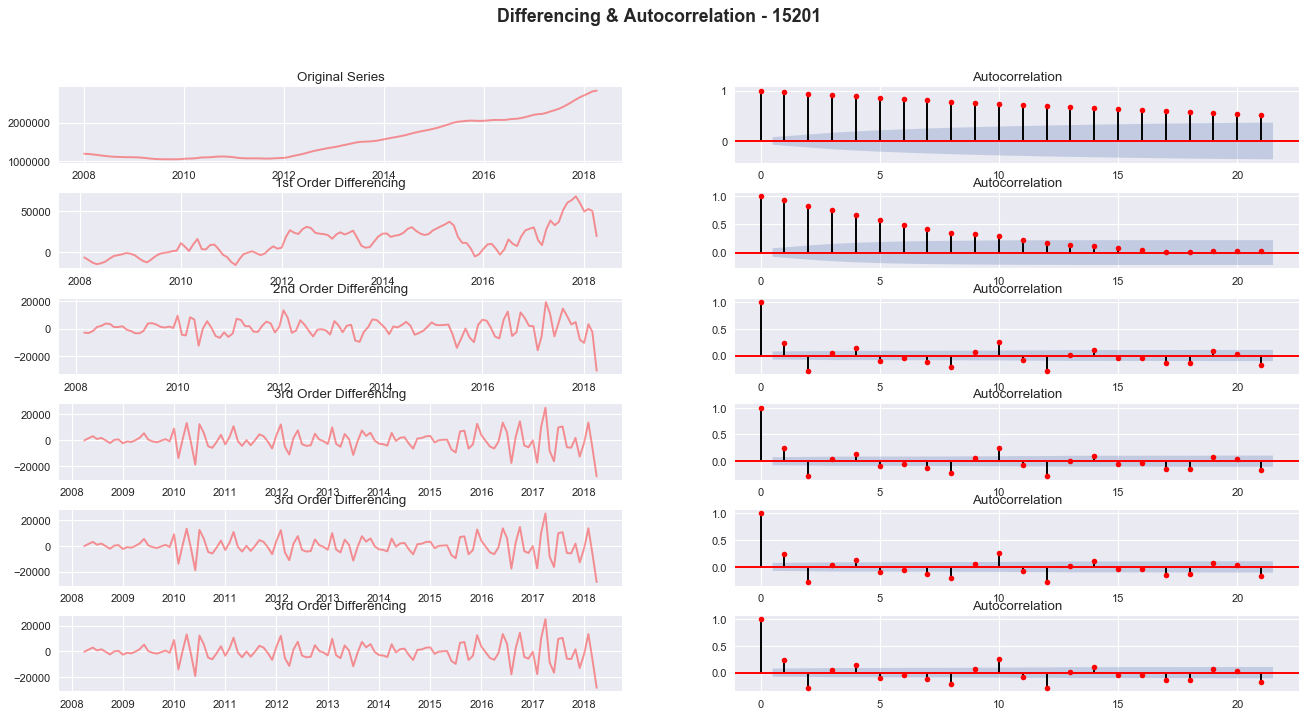

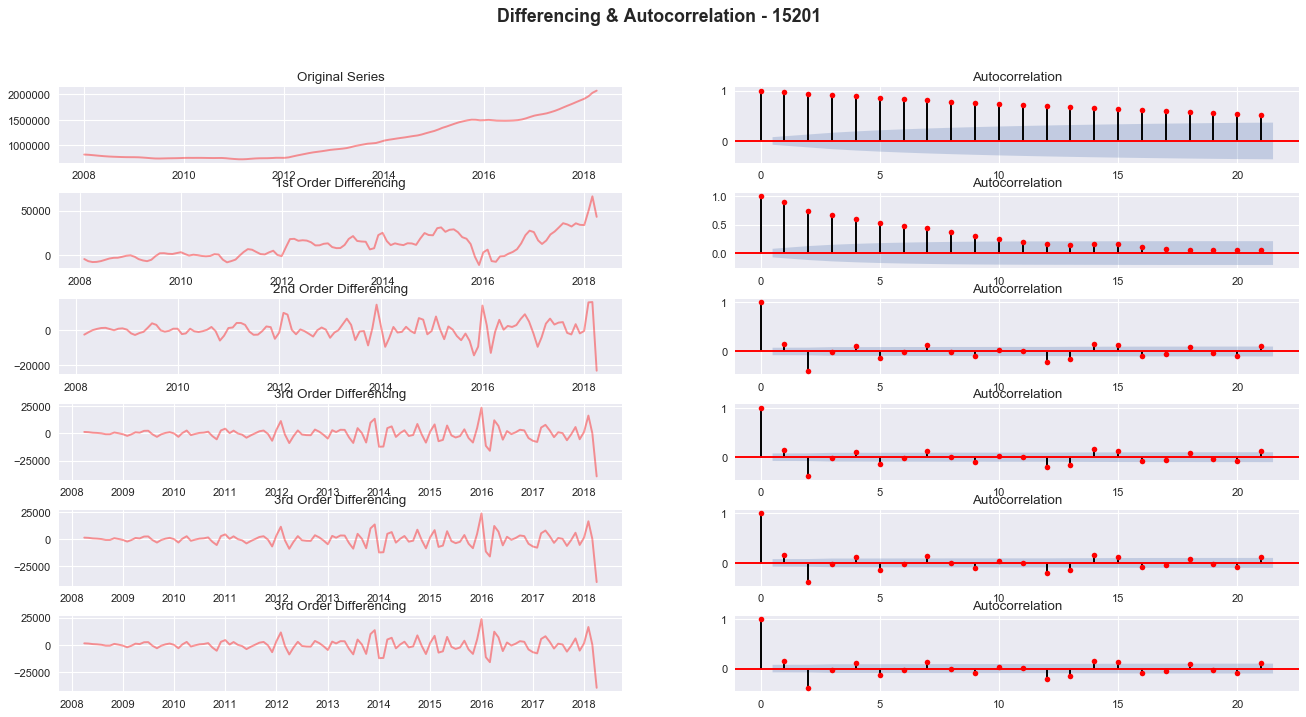

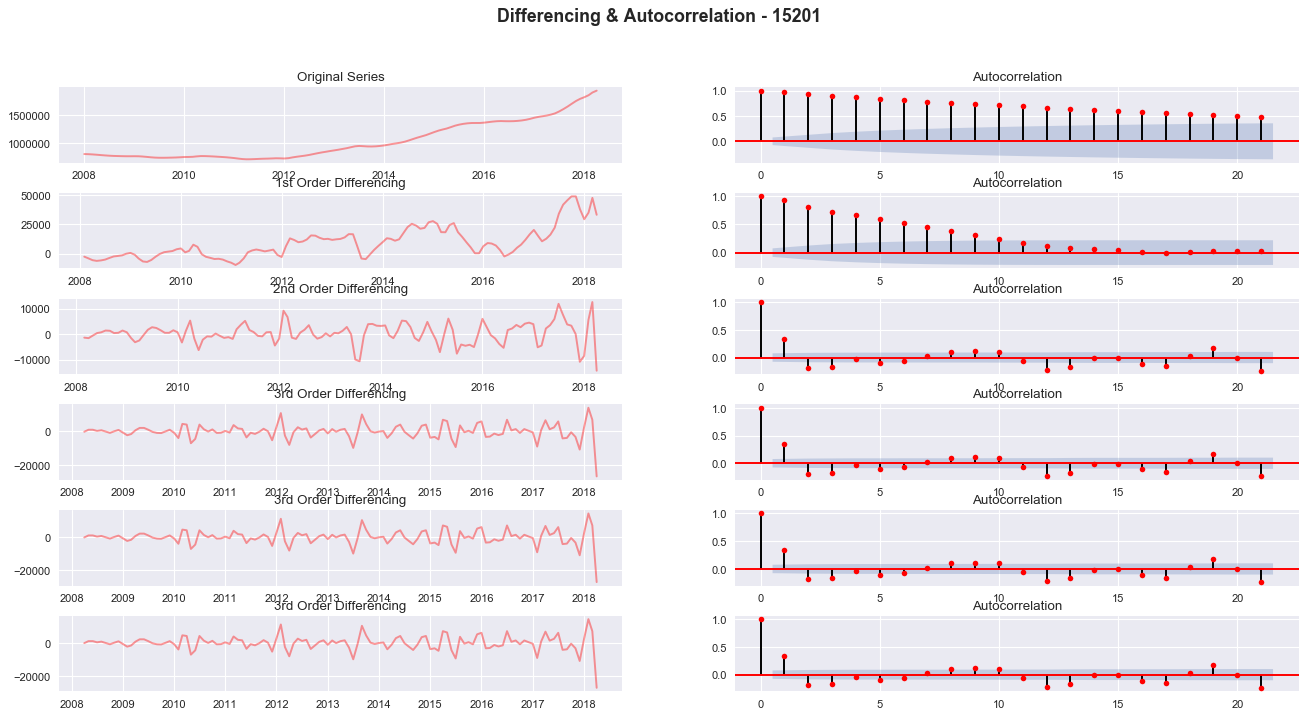

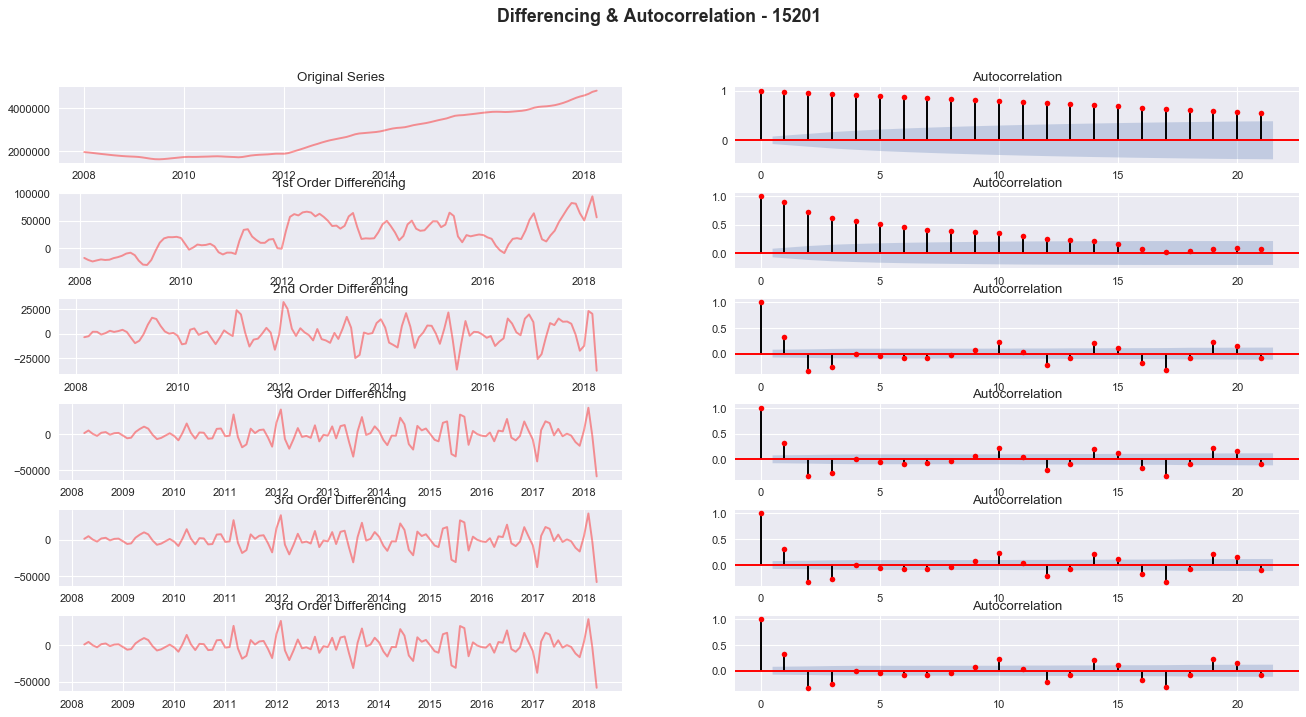

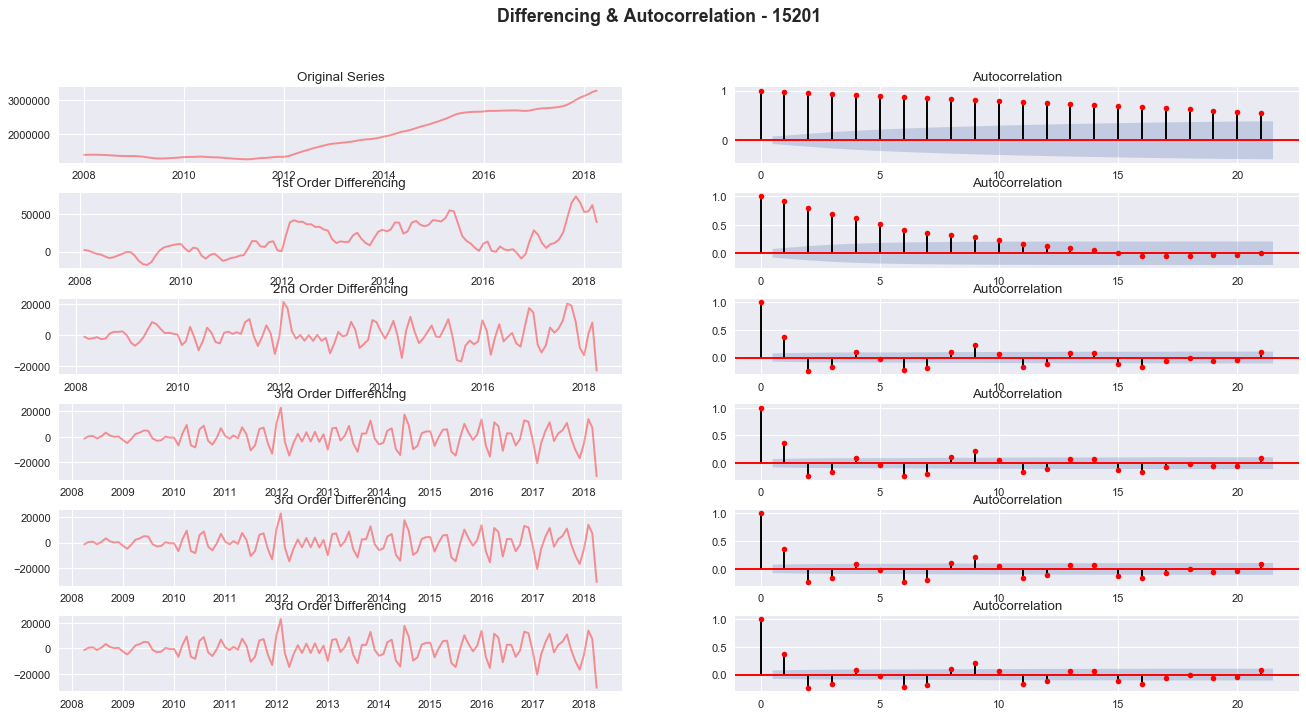

In [55]:
# Plotting ACF up to 5th differenciation for each zipcode

plt.rcParams.update({'figure.figsize': (20,10), 'figure.dpi':80})
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for i in final1:
    df = final[final.Zipcode == i]
    fig, axes = plt.subplots(6,2)
    axes[0, 0].plot(df.value,color='red',alpha=0.4); axes[0, 0].set_title('Original Series',fontsize=12)
    plot_acf(df.value, ax=axes[0, 1], color='red',alpha=0.4)

    
    axes[1, 0].plot(df.value.diff(), color='red',alpha=0.4); axes[1, 0].set_title('1st Order Differencing',fontsize=12)
    plot_acf(df.value.diff().dropna(), ax=axes[1, 1], color='red',alpha=0.4)

    
    axes[2, 0].plot(df.value.diff().diff(), color='red',alpha=0.4); axes[2, 0].set_title('2nd Order Differencing',fontsize=12)
    plot_acf(df.value.diff().diff().dropna(), color='red',alpha=0.4, ax=axes[2, 1])
    
    
    axes[3, 0].plot(df.value.diff().diff().diff(), color='red',alpha=0.4); axes[3, 0].set_title('3rd Order Differencing',fontsize=12)
    plot_acf(df.value.diff().diff().dropna(), ax=axes[3, 1],  color='red',alpha=0.4)
    
    axes[4, 0].plot(df.value.diff().diff().diff(), color='red',alpha=0.4); axes[4, 0].set_title('3rd Order Differencing',fontsize=12)
    plot_acf(df.value.diff().diff().dropna(), ax=axes[4, 1],  color='red',alpha=0.4)
    
    axes[5, 0].plot(df.value.diff().diff().diff(), color='red',alpha=0.4); axes[5, 0].set_title('3rd Order Differencing',fontsize=12)
    plot_acf(df.value.diff().diff().dropna(), ax=axes[5, 1],  color='red',alpha=0.4)

    
    fig.suptitle('Differencing & Autocorrelation - ' + str(z), fontsize=16, fontweight='bold')
    plt.subplots_adjust(hspace = 0.4 )
    plt.show()

As a result, it looks like we need at least differenciate 4 times

### Auto Arima  Forecast

Autoarima uses a stepwise approach to look for the best p,d,q parameters and pick the least AIC.

Zip:  11211
ADF Statistic Residual: -4.612088
p-value: 0.000123


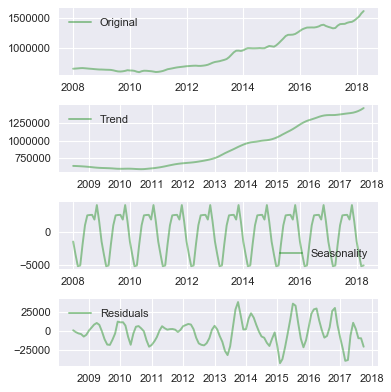

Fit ARIMA: order=(4, 1, 4) seasonal_order=(0, 0, 1, 6); AIC=2830.222, BIC=2861.156, Fit time=0.755 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 6); AIC=2701.737, BIC=2707.361, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 6); AIC=2796.231, BIC=2807.480, Fit time=0.054 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 6); AIC=2731.250, BIC=2742.499, Fit time=0.064 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 6); AIC=2703.609, BIC=2712.045, Fit time=0.026 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 6); AIC=2703.596, BIC=2712.032, Fit time=0.060 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 6); AIC=2705.583, BIC=2716.831, Fit time=0.053 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 6); AIC=2708.596, BIC=2717.033, Fit time=0.078 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 6); AIC=2729.306, BIC=2737.743, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_o

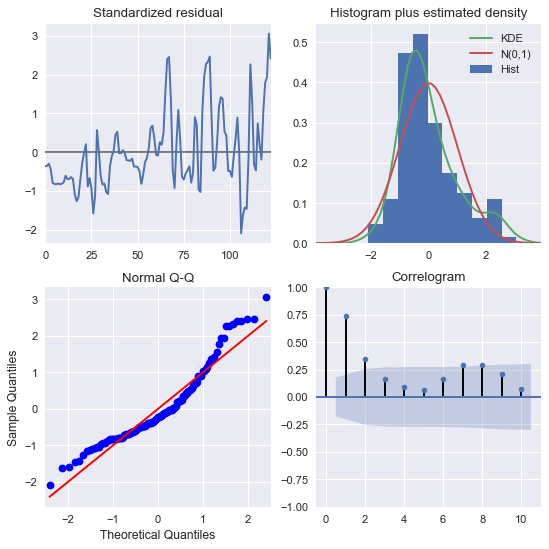

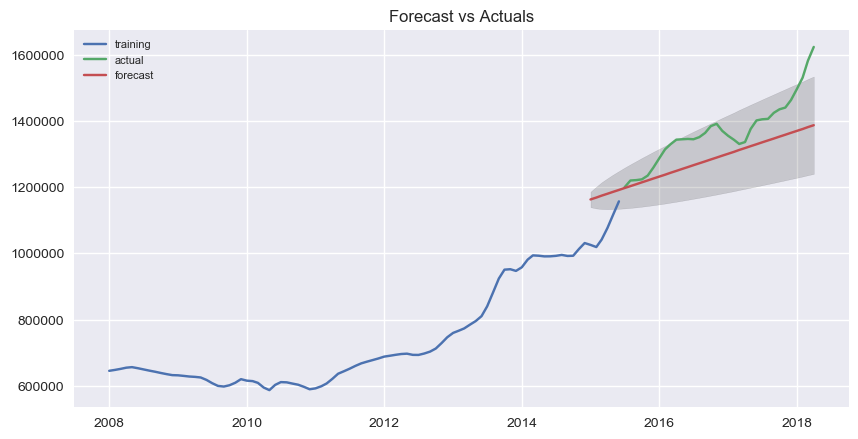

Mean Error : -74747.15796430846


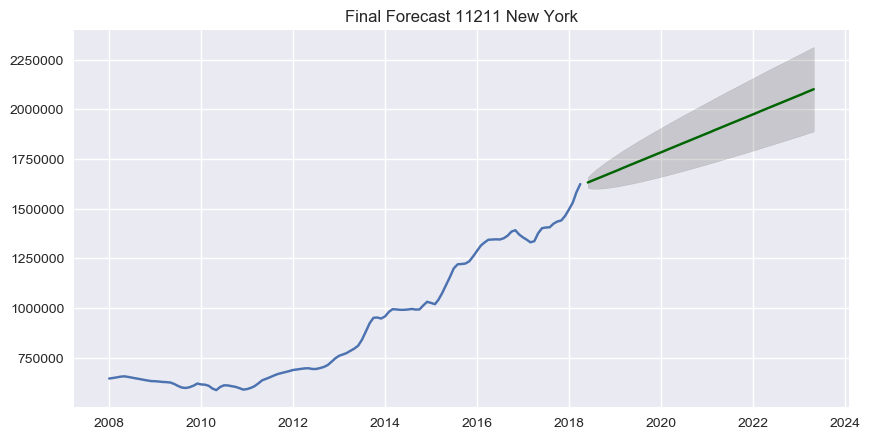

11211
Model Order:  (0, 1, 0)
Upside :  2313653.6934052887 ROI:  39.48792840367614
Base   :  2100968.2926829206 ROI:  28.763064075318457
Low    :  1888282.8919605524 ROI:  14.858850812297256
Zip:  11222
ADF Statistic Residual: -4.154484
p-value: 0.000786


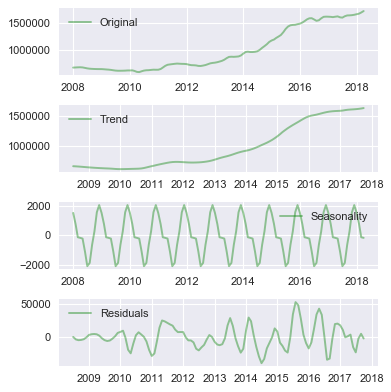

Fit ARIMA: order=(4, 2, 4) seasonal_order=(0, 0, 1, 6); AIC=2654.875, BIC=2685.719, Fit time=1.037 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2608.087, BIC=2613.695, Fit time=0.007 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2612.218, BIC=2623.434, Fit time=0.044 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 6); AIC=2613.393, BIC=2624.609, Fit time=0.056 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2610.066, BIC=2618.478, Fit time=0.022 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 6); AIC=2610.066, BIC=2618.478, Fit time=0.035 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 6); AIC=2612.087, BIC=2623.303, Fit time=0.043 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2610.241, BIC=2618.653, Fit time=0.020 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 6); AIC=2611.418, BIC=2619.830, Fit time=0.027 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_o

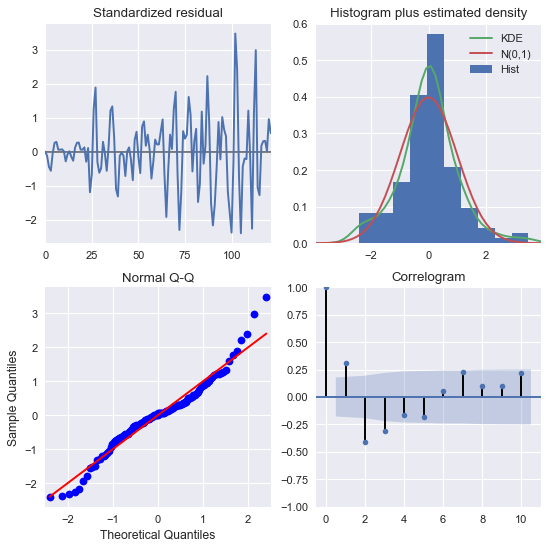

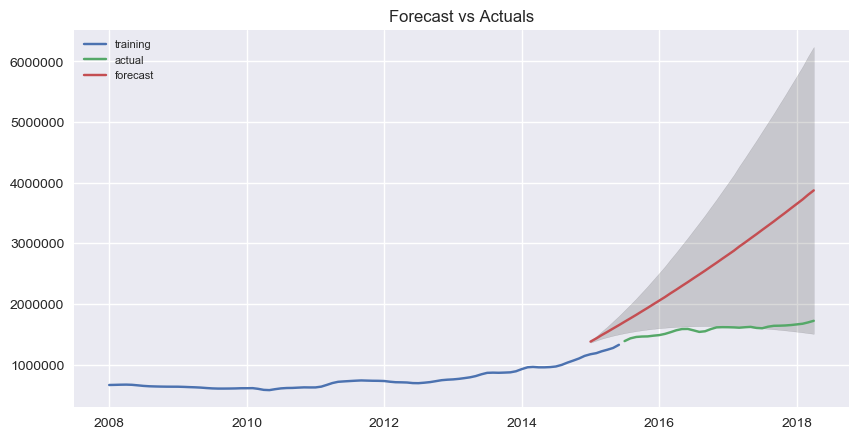

Mean Error : 1162592.513368983


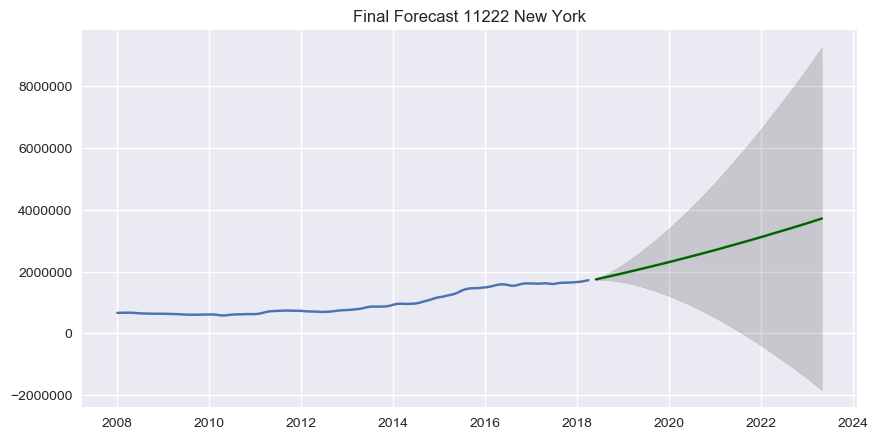

11222
Model Order:  (0, 2, 0)
Upside :  9279057.79961445 ROI:  359.99141557553133
Base   :  3719099.99999999 ROI:  112.71408291968447
Low    :  -1840857.799614469 ROI:  -171.5791333751934
Zip:  15201
ADF Statistic Residual: -2.462304
p-value: 0.124918


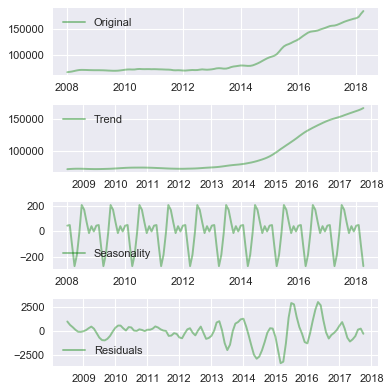

Fit ARIMA: order=(4, 2, 4) seasonal_order=(0, 0, 1, 6); AIC=1931.472, BIC=1962.316, Fit time=0.949 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=1917.017, BIC=1922.625, Fit time=0.007 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=1918.882, BIC=1930.098, Fit time=0.050 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 6); AIC=1917.964, BIC=1929.180, Fit time=0.134 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=1919.017, BIC=1927.429, Fit time=0.023 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 6); AIC=1919.017, BIC=1927.429, Fit time=0.028 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 6); AIC=1921.028, BIC=1932.244, Fit time=0.042 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=1916.272, BIC=1924.684, Fit time=0.058 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 6); AIC=1917.290, BIC=1928.507, Fit time=0.104 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_o

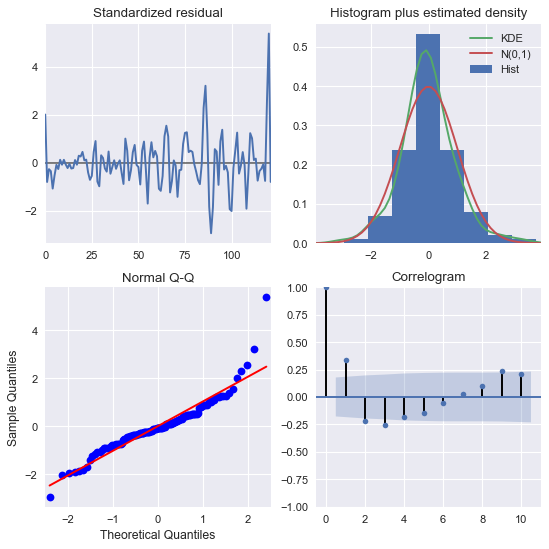

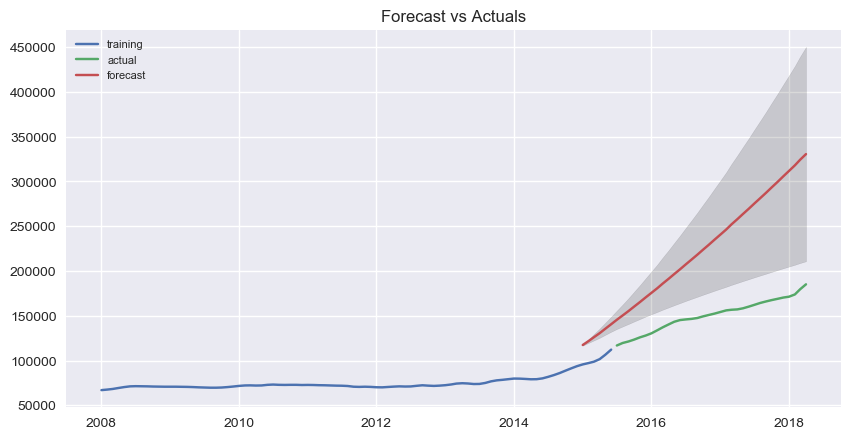

Mean Error : 83884.21878470932


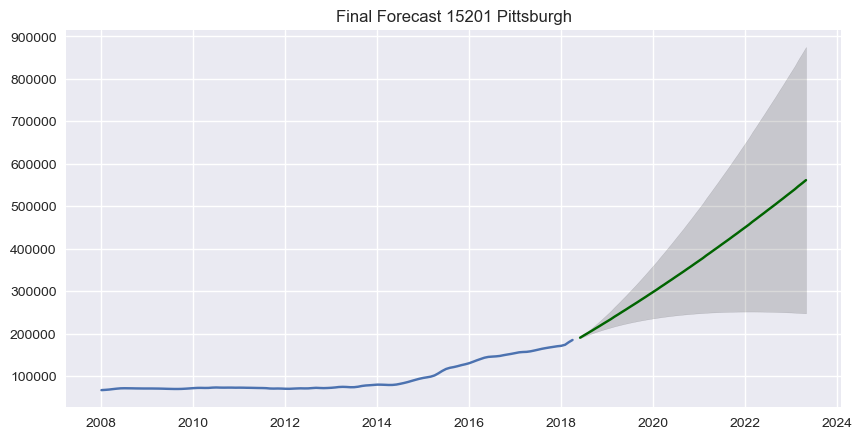

15201
Model Order:  (2, 2, 0)
Upside :  875167.2419427396 ROI:  266.41977280485094
Base   :  561562.726236154 ROI:  194.7613044626869
Low    :  247958.2105295683 ROI:  22.353178686386048
Zip:  94040
ADF Statistic Residual: -3.129918
p-value: 0.024417


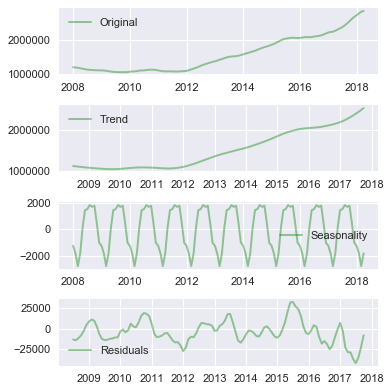

Fit ARIMA: order=(4, 2, 4) seasonal_order=(0, 0, 1, 6); AIC=2513.445, BIC=2544.289, Fit time=0.333 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2486.843, BIC=2492.451, Fit time=0.006 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2490.666, BIC=2501.882, Fit time=0.056 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 6); AIC=2494.622, BIC=2505.838, Fit time=0.120 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2488.793, BIC=2497.205, Fit time=0.023 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 6); AIC=2488.793, BIC=2497.205, Fit time=0.102 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 6); AIC=2490.821, BIC=2502.037, Fit time=0.117 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2488.719, BIC=2497.131, Fit time=0.020 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 6); AIC=2492.686, BIC=2501.098, Fit time=0.023 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_o

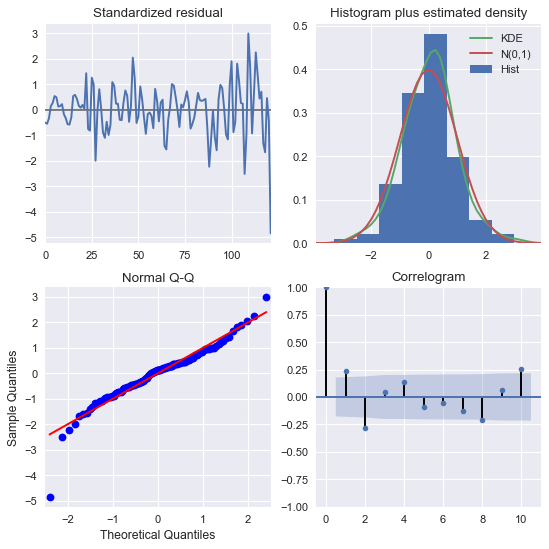

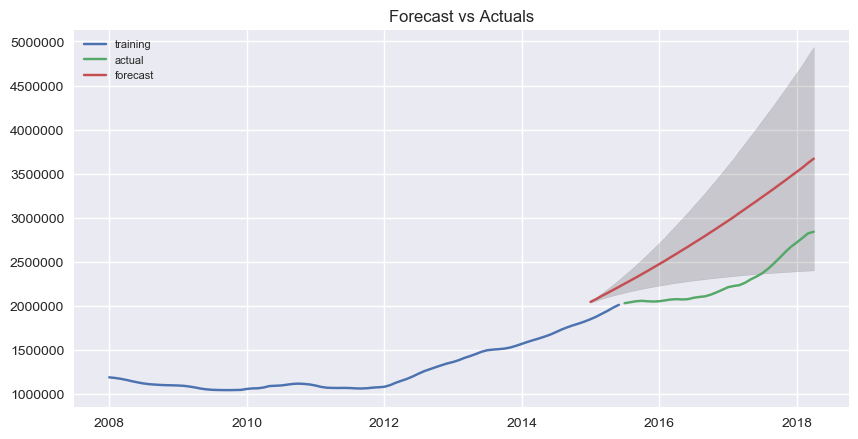

Mean Error : 649359.0909090904


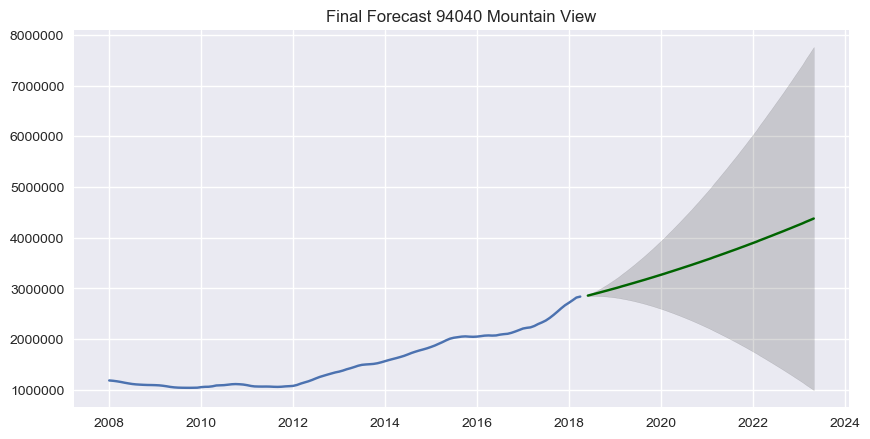

94040
Model Order:  (0, 2, 0)
Upside :  7761250.598533133 ROI:  157.71544943041803
Base   :  4378499.999999997 ROI:  53.152695970494236
Low    :  995749.4014668618 ROI:  -59.94066025901802
Zip:  94043
ADF Statistic Residual: -3.464577
p-value: 0.008945


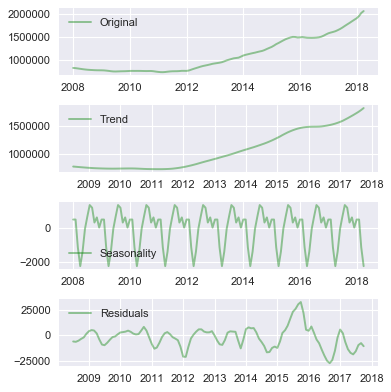

Fit ARIMA: order=(4, 2, 4) seasonal_order=(0, 0, 1, 6); AIC=2477.205, BIC=2508.049, Fit time=1.071 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2441.883, BIC=2447.491, Fit time=0.007 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2445.524, BIC=2456.740, Fit time=0.041 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 6); AIC=2446.856, BIC=2458.072, Fit time=0.061 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2443.882, BIC=2452.295, Fit time=0.021 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 6); AIC=2443.883, BIC=2452.295, Fit time=0.029 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 6); AIC=2445.888, BIC=2457.104, Fit time=0.087 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2443.524, BIC=2451.937, Fit time=0.017 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 6); AIC=2444.857, BIC=2453.269, Fit time=0.027 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_o

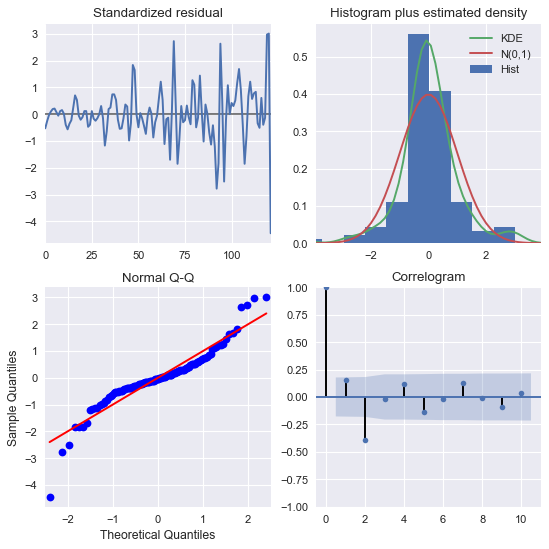

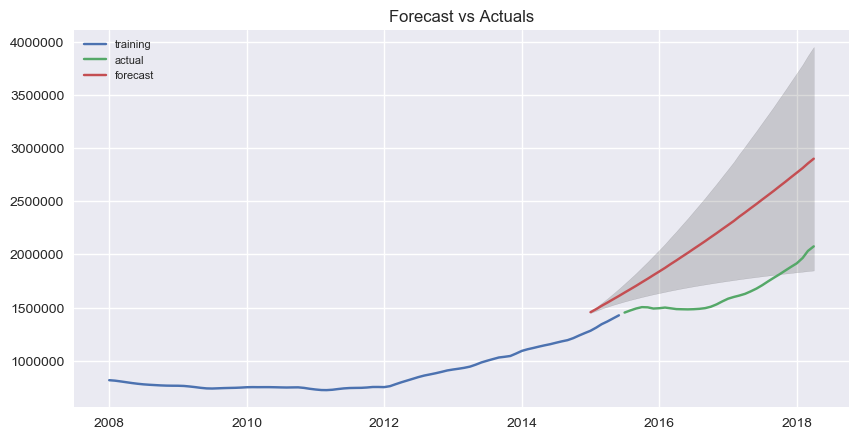

Mean Error : 605909.0909090907


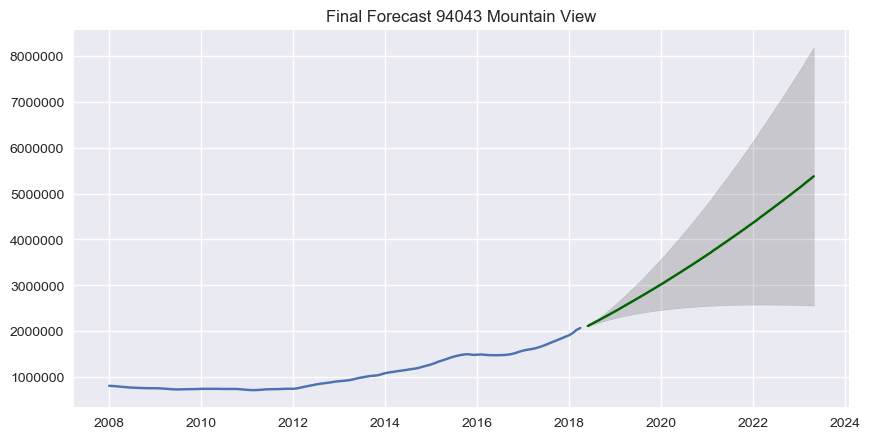

94043
Model Order:  (0, 2, 0)
Upside :  8188394.51327718 ROI:  227.28098145016529
Base   :  5374900.000000009 ROI:  153.72568715185875
Low    :  2561405.486722839 ROI:  16.587954730496143
Zip:  94086
ADF Statistic Residual: -3.693291
p-value: 0.004209


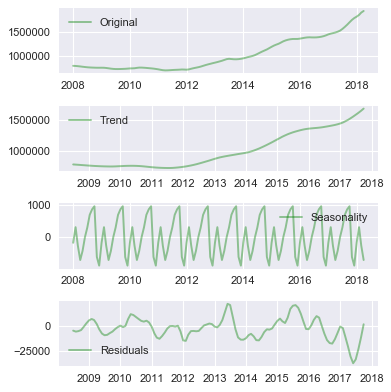

Fit ARIMA: order=(4, 2, 4) seasonal_order=(0, 0, 1, 6); AIC=2411.889, BIC=2442.733, Fit time=1.512 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2381.808, BIC=2387.416, Fit time=0.007 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2386.635, BIC=2397.851, Fit time=0.050 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 6); AIC=2391.888, BIC=2403.104, Fit time=0.116 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2383.783, BIC=2392.195, Fit time=0.021 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 6); AIC=2383.783, BIC=2392.195, Fit time=0.028 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 6); AIC=2385.778, BIC=2396.994, Fit time=0.118 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2384.664, BIC=2393.076, Fit time=0.019 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 6); AIC=2389.924, BIC=2398.336, Fit time=0.031 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_o

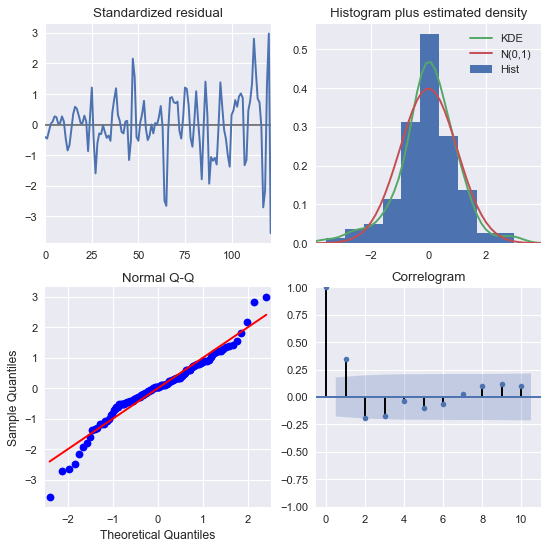

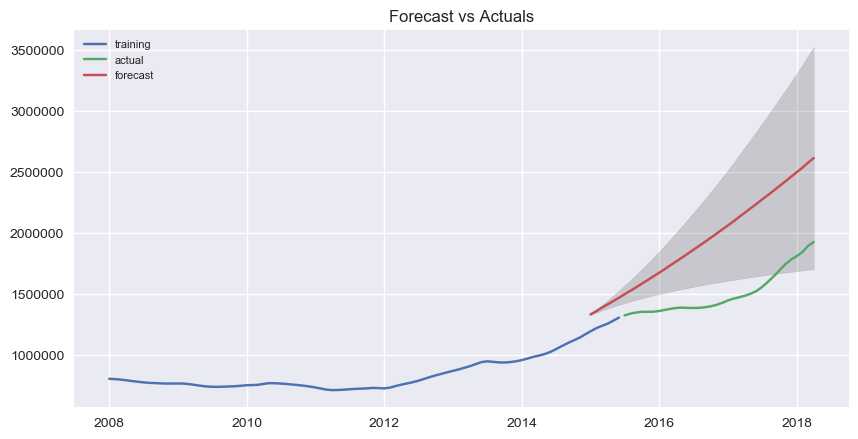

Mean Error : 522729.4117647059


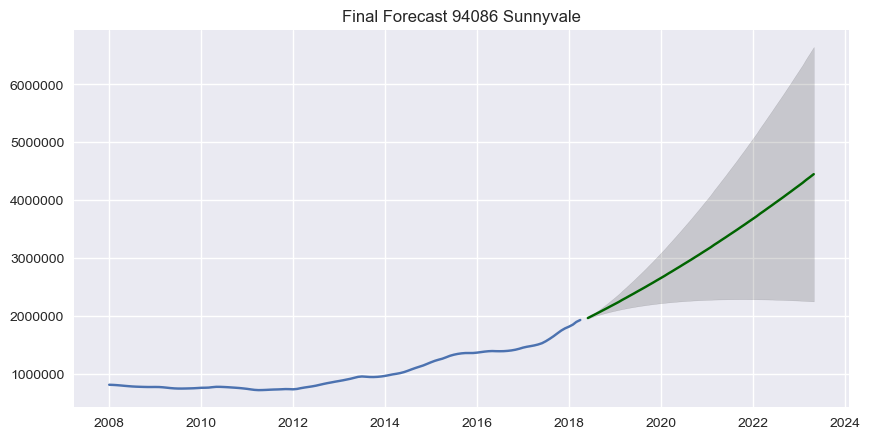

94086
Model Order:  (0, 2, 0)
Upside :  6647772.363451334 ROI:  196.64904664137308
Base   :  4448299.999999998 ROI:  126.93177945459514
Low    :  2248827.6365486626 ROI:  12.108551404669022
Zip:  94301
ADF Statistic Residual: -3.075596
p-value: 0.028413


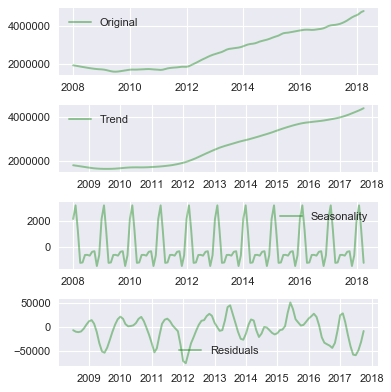

Fit ARIMA: order=(4, 2, 4) seasonal_order=(0, 0, 1, 6); AIC=2674.197, BIC=2705.041, Fit time=0.374 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2634.890, BIC=2640.498, Fit time=0.006 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2639.360, BIC=2650.576, Fit time=0.046 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 6); AIC=2642.635, BIC=2653.851, Fit time=0.076 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2636.871, BIC=2645.283, Fit time=0.075 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 6); AIC=2636.871, BIC=2645.283, Fit time=0.030 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 6); AIC=2638.872, BIC=2650.088, Fit time=0.099 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2637.380, BIC=2645.792, Fit time=0.019 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 6); AIC=2640.658, BIC=2649.070, Fit time=0.020 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_o

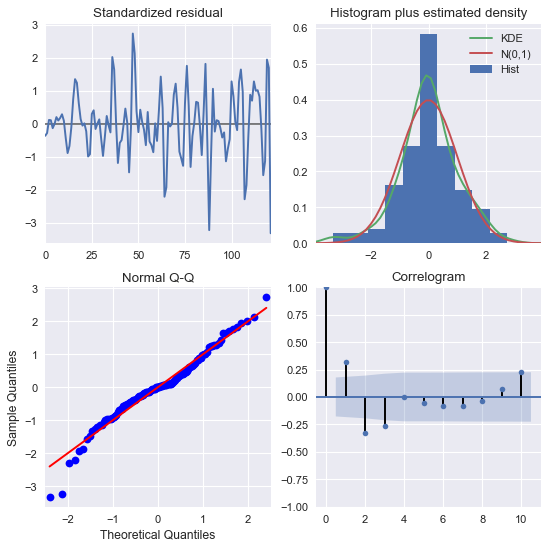

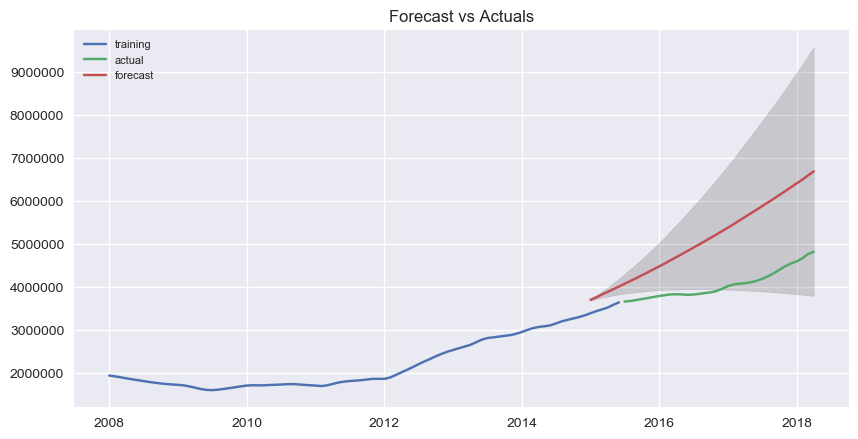

Mean Error : 1244869.5187165772


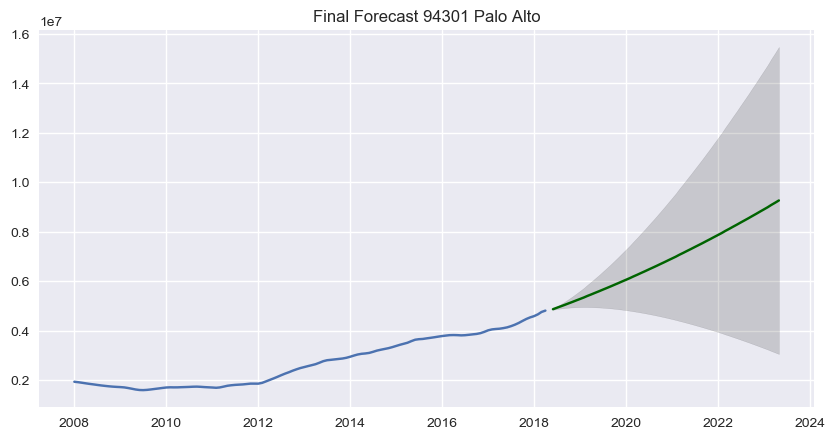

94301
Model Order:  (0, 2, 0)
Upside :  15475900.191462466 ROI:  189.3493135345892
Base   :  9270399.99999999 ROI:  90.16972521799936
Low    :  3064899.808537515 ROI:  -32.327218820537205
Zip:  94306
ADF Statistic Residual: -3.263068
p-value: 0.016612


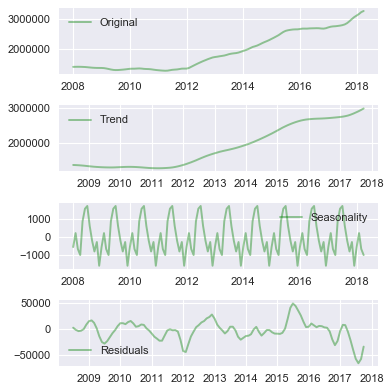

Fit ARIMA: order=(4, 2, 4) seasonal_order=(0, 0, 1, 6); AIC=2555.924, BIC=2586.768, Fit time=1.468 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2522.994, BIC=2528.602, Fit time=0.006 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2528.347, BIC=2539.563, Fit time=0.051 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 6); AIC=2538.531, BIC=2549.747, Fit time=0.116 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 6); AIC=2524.973, BIC=2533.385, Fit time=0.024 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 6); AIC=2524.973, BIC=2533.385, Fit time=0.033 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 6); AIC=2526.954, BIC=2538.170, Fit time=0.102 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 6); AIC=2526.371, BIC=2534.783, Fit time=0.019 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 6); AIC=2536.560, BIC=2544.972, Fit time=0.041 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_o

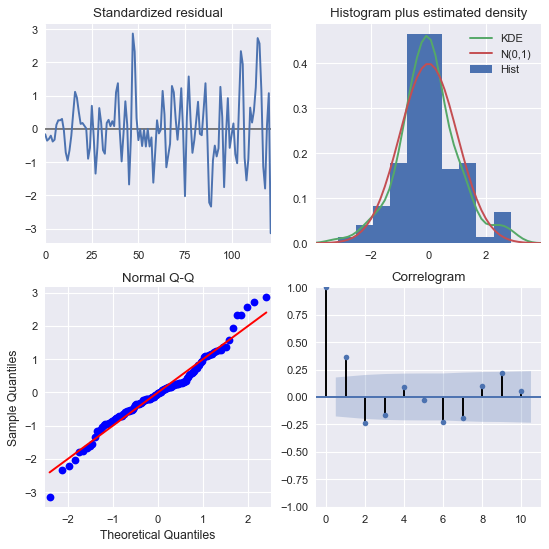

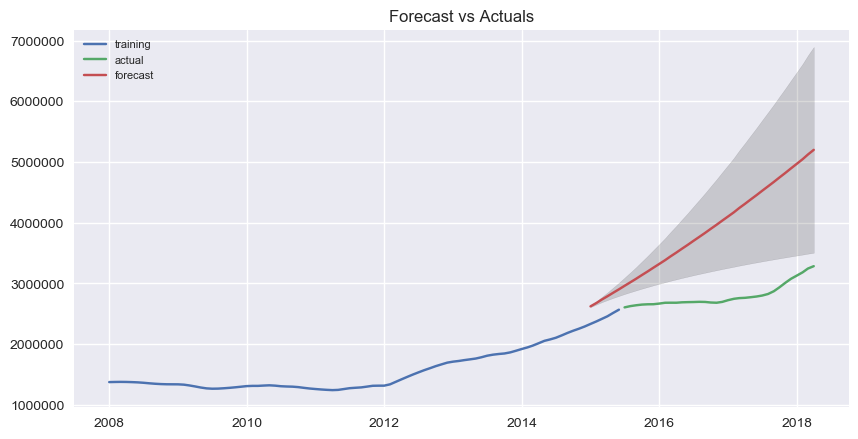

Mean Error : 1235088.7700534763


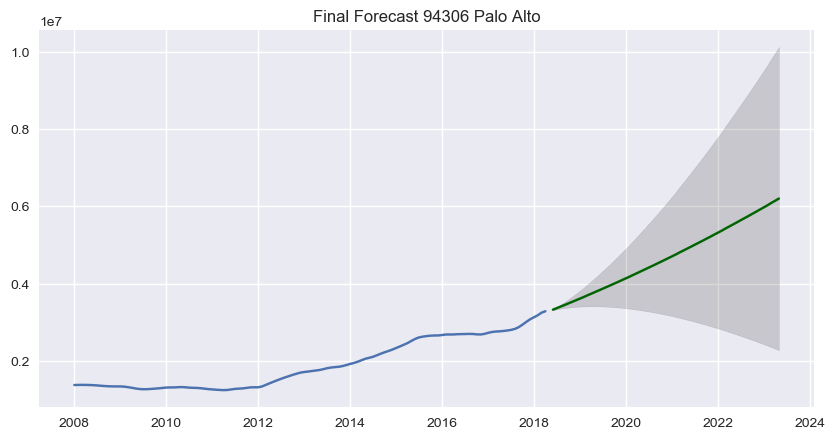

94306
Model Order:  (0, 2, 0)
Upside :  10122567.630688665 ROI:  177.78360282802865
Base   :  6199599.999999996 ROI:  86.47072992321011
Low    :  2276632.3693113276 ROI:  -27.410077758471875


In [83]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose

residuals_list = []
for z in final1: 
    df = final[final.Zipcode == z]
    ts = df.value
    decomposition = seasonal_decompose(ts)

# Decomposing Tend, seasonality and noise of decomposed object
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    df['res'] = residual
    residuals_list.append(residual)
    
# Plotting decomposition
    plt.figure(figsize=(5,5))
    plt.subplot(411)
    plt.plot(ts, label='Original', color='green',alpha=0.4)
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='green',alpha=0.4)
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='green',alpha=0.4)
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='green',alpha=0.4)
    plt.legend(loc='best')
    plt.tight_layout()
    result = adfuller(residual.dropna())
    print('Zip: ', z)
    print('ADF Statistic Residual: %f' % result[0])
    print('p-value: %f' % result[1])
    plt.show()
    

    model = pm.auto_arima(df.value.dropna(), start_p=4, start_q=4,
                      test='adf',           # Dicky-Fuller test to set 'd'
                      max_p=10, max_q=10,   # higher p and q # for higher accuracy
                      m=6,              # frequency of series
                      d=None,           
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    print(z)
    print(model.summary())
    model.plot_diagnostics(figsize=(8, 8))
    plt.show()
    
    
    train = df.value.dropna()[:90]
    test = df.value.dropna()[90:]
    
    test_index = final.index[-40:]
    model2 = ARIMA(train, order=model.order)
    fitted = model2.fit(disp=-1)  
                   
    
    fc, se, conf = fitted.forecast(40, alpha=0.05)  # 95% conf


    fc_series = pd.Series(fc, index=test_index)
    lower_series = pd.Series(conf[:, 0], index=test_index)
    upper_series = pd.Series(conf[:, 1], index=test_index)

 
    plt.figure(figsize=(10,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
    print('Mean Error :', np.mean(fc_series - test))
    
    
    
    n_periods = 60
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    #index_of_fc = np.arange(len(df_z.value), len(df_z.value)+n_periods)
    
    index_of_fc = pd.date_range('2018-05-01', periods=60, freq='M')
    # make series for plotting purpose
    fc_series = pd.Series(fc, index=(index_of_fc))
    lower_series = pd.Series(confint[:, 0], index=(index_of_fc))
    upper_series = pd.Series(confint[:, 1], index=(index_of_fc))

    # Plot
    plt.figure(figsize=(10,5), dpi=100)

    plt.plot(fc_series, color='darkgreen')
    plt.plot(df.value)
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("Final Forecast " + str(z) + ' ' + df.City[0])
    plt.show()
    print(z)
    print('Model Order: ', model.order)
    print('Upside : ', upper_series[-1], 'ROI: ', (upper_series[-1]-fc_series[-60])/fc_series[-48]*100)
    print('Base   : ', fc_series[-1], 'ROI: ', (fc_series[-1]-fc_series[-60])/fc_series[-60]*100)
    print('Low    : ', lower_series[-1], 'ROI: ', (lower_series[-1]-fc_series[-60])/fc_series[-48]*100)

## Result

1. 15201, Pittsburg, PA
    - 206% ROI
2. 94043 Mountain View, CA
    - 150.05% ROI
3. 94086, Sunnyvale, CA
    - 126.12% ROI
4. 11211, Williamsburg, NY
    - 28.76% ROI
5. 80205, Denver, CO
    - 25.09% ROI